## Dacon 영화 관객수 예측 모델 개발 EDA
* box_off_num을 예측해야함 (target값)

#### 라이브러리 import 및 데이터 load

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [8]:
data = pd.read_csv("data/movies_train.csv")

In [9]:
data.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


#### pd.decribe()

* 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

* 기술통계량이란?
 * 해당 column을 대표할 수 있는 통계값들을 의미
* 기술통계량 종류
 * count: 해당 column에서 비어 있지 않은 값의 개수
 * mean: 평균
 * std: 표준편차
 * min: 최솟값 (이상치 포함)
 * 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 * 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 * 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 * max: 최댓값 (이상치 포함)
* 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
 * 아래쪽 울타리: Q_1Q1​ - 1.5 * IQR1.5∗IQR
 * 위쪽 울타리: Q_3Q3​ + 1.5 * IQR1.5∗IQR
 * IQRIQR = Q_3 - Q_1Q3​−Q1​

In [11]:
data.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


### 결측치(Nan, null)처리
---


#### pd.isnull()
* null 확인
 * dir_prev_bfnum 만들기 전 영화 관객수  
 
 
#### pd.dropna(axis=1)
 * null값 있는 열 삭제(axis=1은 열 row를 삭제한다는 뜻)
 * 추가적으로 thresh = num은 Nan값이 num이상인 row, col만 삭제함  
 
 
#### pd.fillna(num, inplace = True)
 * 결측치를 num으로 대체함  

In [16]:
data.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [17]:
#dir_prev_bfnum row가 삭제되었다.
data = data.dropna(axis=1)
data.isnull().sum()

title            0
distributor      0
genre            0
release_time     0
time             0
screening_rat    0
director         0
dir_prev_num     0
num_staff        0
num_actor        0
box_off_num      0
dtype: int64

#### sns.heatmap
* heatmap을 통해 두 개의 카테고리 값에 대한 변화를 확인
* float값만 할 수 있는듯?
* title이 str이라서 오류가 남.
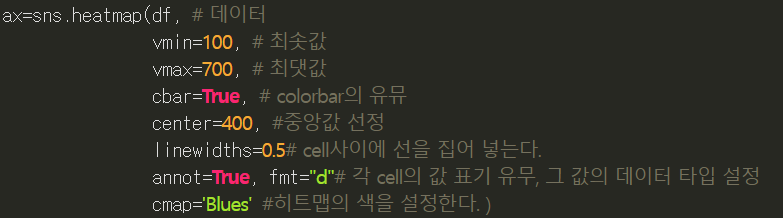

#### df.drop()
* axis 파라미터를 통해 row, col 지정가능(axis = 1 이면 row에 대해서 drop)

#### df.corr()
* 상관관계 분석함
* 주의할 점
 * 연속형(float, int) 데이터에 대해서만 상관관계 분석
 * -1 ~ 1까지의 값으로 상관관계 크기를 보여줌(양수이면 하나가 비례, 음수이면 반비례)
 * **상관관계가 인과관계를 의미하지 않는다**
 
#### 결과
* num_staff 정도만 target값에 영향을 미치는 듯 하다.
* drop한 row가 너무 많아서 제대로 분석이 진행된 것 같지는 않다.

<AxesSubplot:title={'center':'Features'}>

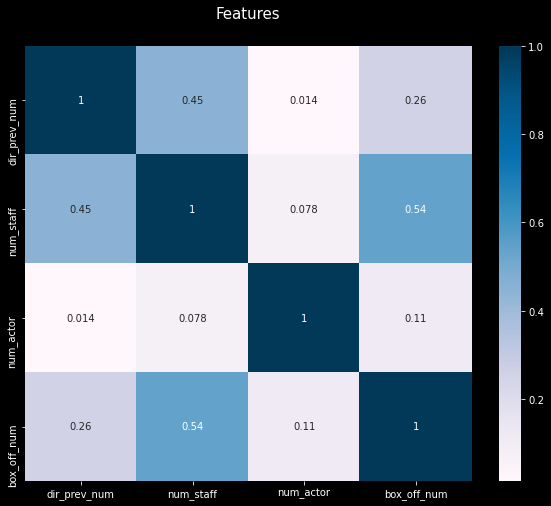

In [37]:
data_drop_str = data.drop(['title',
                           'distributor',
                           'genre',
                           'release_time',
                           'time',
                           'screening_rat',
                           'director']
                           ,axis=1)

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Features", y = 1.05, size = 15)
plt.style.use(['dark_background'])
sns.heatmap(data_drop_str.corr(), cmap = colormap,annot=True,)

#### 너무 drop되는 데이터가 많은 것 같음.
* 버려지는 데이터가 많아 상관 관계가 분석이 잘 된것 같지 않음
* labeling을 해보자!!!  


#### df.value_counts()
* 값별로 데이터의 수 출력


In [53]:
data['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [54]:
data['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [57]:
data['distributor'].value_counts(ascending = True)

에이원 엔터테인먼트       1
(주)유비네트워크        1
(주)아이필름코퍼레이션     1
(주)유비콘텐츠         1
(주)피터팬픽쳐스        1
                ..
인디스토리           26
(주)마운틴픽쳐스       29
(주)NEW          30
롯데엔터테인먼트        52
CJ 엔터테인먼트       54
Name: distributor, Length: 169, dtype: int64